In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
import numpy as np
import itertools
import random
import shutil
import os
%matplotlib inline

In [3]:
train_path='base_data/Training'
valid_path='base_data/Validation'
test_path='base_data/Testing'

In [4]:
train_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=train_path,target_size=(224,224),batch_size=10)
valid_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=valid_path,target_size=(224,224),batch_size=10)
test_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=test_path,target_size=(224,224),batch_size=10,shuffle=False)

Found 40 images belonging to 4 classes.
Found 32 images belonging to 4 classes.
Found 24 images belonging to 4 classes.


In [5]:
mobile=tf.keras.applications.mobilenet.MobileNet()

In [6]:
x=mobile.layers[-6].output
output=Dense(units=4,activation='softmax')(x)

In [7]:
model=Model(inputs=mobile.input,outputs=output)

In [8]:
for layers in model.layers[:-23]:
    layers.trainable=False

In [9]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics='accuracy')

In [10]:
model1=model.fit(train_batches,
         steps_per_epoch=4,
         epochs=15,
         #verbose=2,
         validation_data=valid_batches)

Epoch 1/15
4/4 [==============================] - 5s 907ms/step - loss: 1.6285 - accuracy: 0.3250 - val_loss: 1.1723 - val_accuracy: 0.5000
Epoch 2/15
4/4 [==============================] - 3s 749ms/step - loss: 0.3643 - accuracy: 0.9000 - val_loss: 0.9226 - val_accuracy: 0.6250
Epoch 3/15
4/4 [==============================] - 3s 806ms/step - loss: 0.1244 - accuracy: 1.0000 - val_loss: 0.8550 - val_accuracy: 0.6875
Epoch 4/15
4/4 [==============================] - 3s 976ms/step - loss: 0.0447 - accuracy: 1.0000 - val_loss: 0.8114 - val_accuracy: 0.7500
Epoch 5/15
4/4 [==============================] - 3s 754ms/step - loss: 0.0205 - accuracy: 1.0000 - val_loss: 0.7809 - val_accuracy: 0.7500
Epoch 6/15
4/4 [==============================] - 3s 721ms/step - loss: 0.0230 - accuracy: 1.0000 - val_loss: 0.7491 - val_accuracy: 0.7500
Epoch 7/15
4/4 [==============================] - 3s 753ms/step - loss: 0.0214 - accuracy: 1.0000 - val_loss: 0.7161 - val_accuracy: 0.7500
Epoch 8/15
4/4 [====

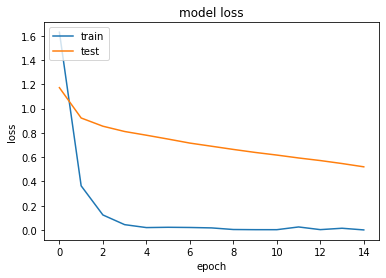

In [11]:
plt.plot(model1.history['loss'])
plt.plot(model1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

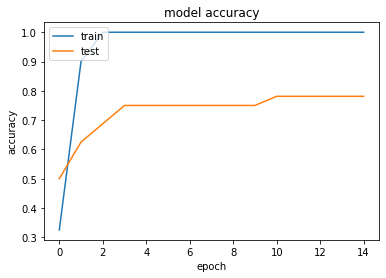

In [12]:
plt.plot(model1.history['accuracy'])
plt.plot(model1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

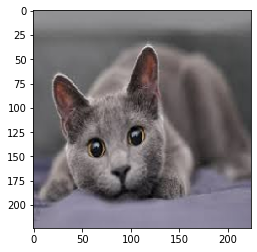

Panda


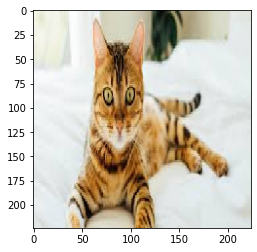

Panda


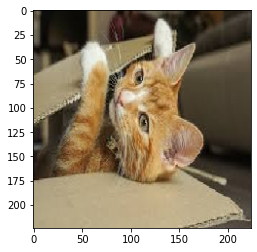

Panda


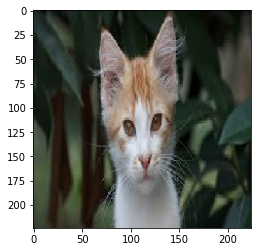

Panda


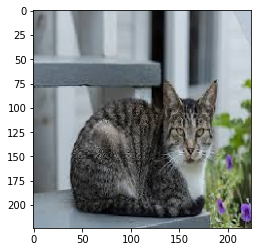

Panda


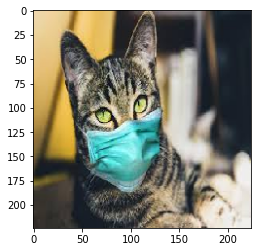

Panda


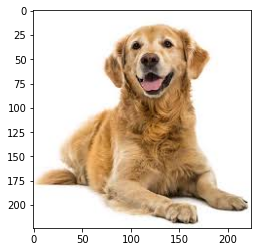

Panda


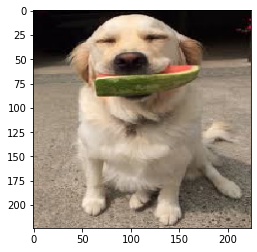

Panda


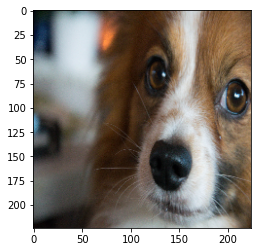

Panda


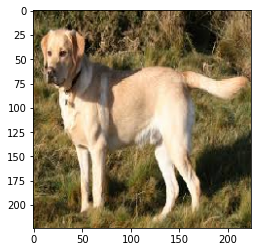

Panda


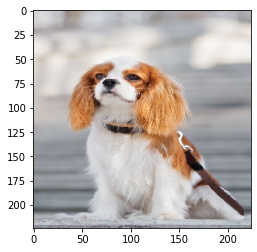

Panda


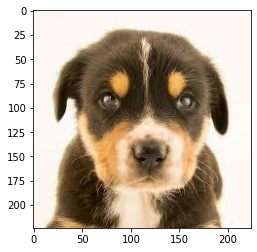

Panda


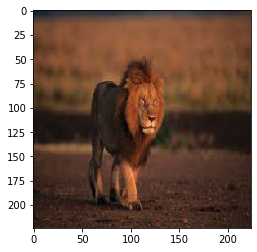

Panda


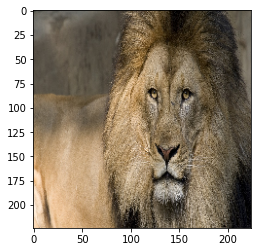

Panda


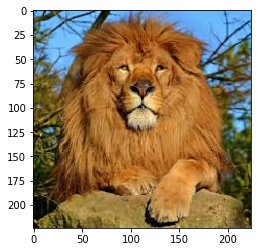

Panda


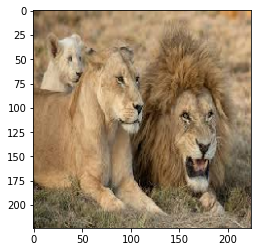

Panda


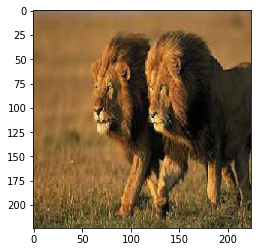

Panda


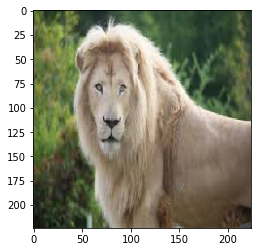

Panda


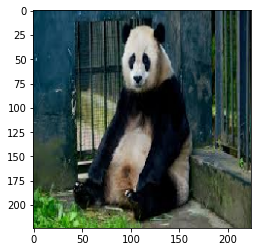

Panda


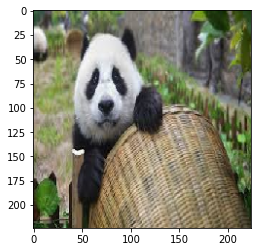

Panda


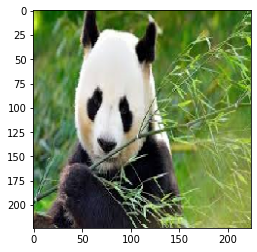

Panda


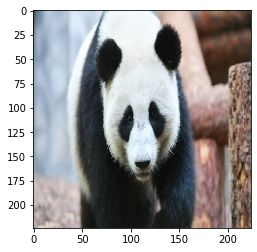

Panda


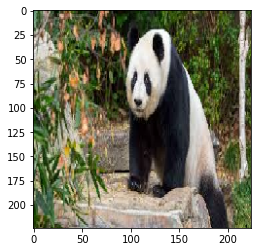

Panda


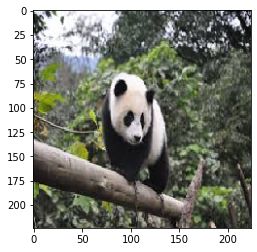

Panda


In [13]:
dir_path='base_data/Testing'
for i in os.listdir(dir_path):
    for j in range(1,7):
        img=image.load_img(dir_path+'/'+i+'/'+'img'+str(j)+'.jpg',target_size=(224,224))
        plt.imshow(img)
        plt.show()
        
        x=image.img_to_array(img)
        x=np.expand_dims(x,axis=0)
        images=np.vstack([x])
        c=model.predict(images)
        if c[0][0]==1:
            print("Cat")
        elif c[0][1]==1:
            print('Dog')
        elif c[0][2]==1:
            print("Lion")
        else:
            print('Panda')